In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error, r2_score)




### 1. Run the feature engineering file to get the train, val, test set

[*********************100%***********************]  1 of 1 completed


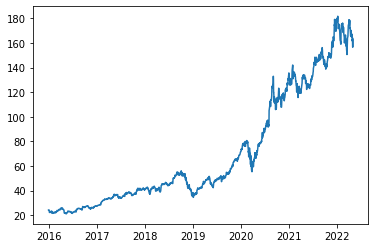

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1573 non-null   datetime64[ns]
 1   D_m3       1573 non-null   float64       
 2   D_m2       1573 non-null   float64       
 3   D_m1       1573 non-null   float64       
 4   Adj Close  1573 non-null   float64       
 5   bb_m1      1573 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 73.9 KB
           Date
0    2016-02-02
1    2016-02-03
2    2016-02-04
3    2016-02-05
4    2016-02-08
...         ...
1567 2022-04-22
1568 2022-04-25
1569 2022-04-26
1570 2022-04-27
1571 2022-04-28

[1572 rows x 1 columns]
         bb_m1      D_m3      D_m2      D_m1
0    -0.105413  0.007172  0.034541 -0.009349
1    -0.134903  0.034541 -0.009349 -0.020222
2    -0.108552 -0.009349 -0.020222  0.019793
3    -0.060615 -0.020222  0.019793  0.008035
4     0.042267  

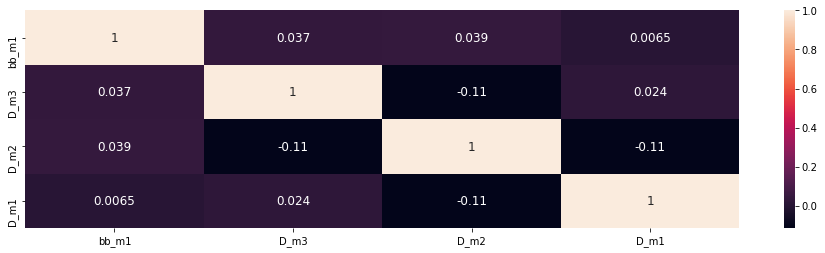

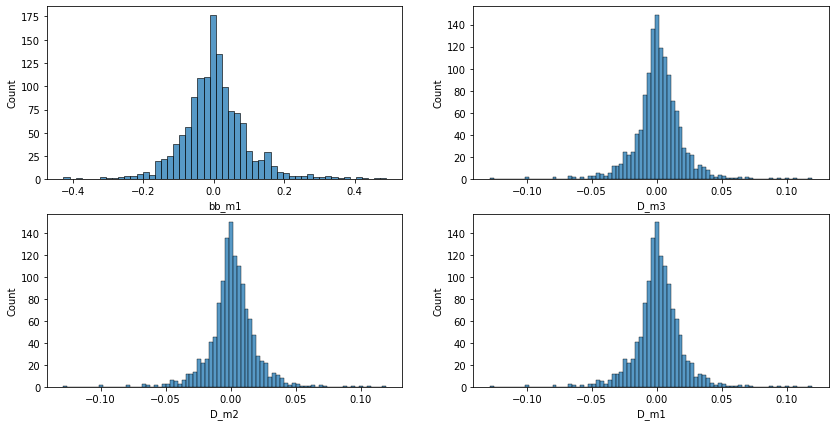

In [2]:
## Run below code to get data inclusive of Bband only with prices
%run DS105FP_ProjectScript_EdwinWan_1featureeng_final.ipynb

## Run below code to get data inclusive of MACD, MFI and BBand with prices
# %run DS105FP_ProjectScript_EdwinWan_1featureeng_initial.ipynb

### 2. Create the Linear Regression model (base)

In [3]:
#Create the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)
model

LinearRegression()

### 4. Predict pct_change, calculate the predicted price to compare with actual. Performance is also tested

- Predict and calculate predicted price and performance for train set

In [6]:
train_predictions = model.predict(x_train)
train_predictions

array([[ 0.00334923],
       [ 0.00389673],
       [-0.00029208],
       ...,
       [ 0.00247239],
       [ 0.00173828],
       [-0.00056998]])

In [7]:
pred_train = pd.DataFrame(train_predictions, columns=['pred_train'])
pred_train

,pred_train
0,0.003349
1,0.003897
2,-0.000292
3,0.001410
4,0.004368
...,...
1331,-0.000095
1332,0.002706
1333,0.002472
1334,0.001738


In [8]:
df_compare = dates_train.merge(y_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(pred_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(prev_train, how='left', left_index=True, right_index=True)
df_compare['actual_close']=(df_compare['Adj Close']*df_compare['prev_close'])+df_compare['prev_close']
df_compare['pred_close']=(df_compare['pred_train']*df_compare['prev_close'])+df_compare['prev_close']
df_compare

,Date,Adj Close,pred_train,prev_close,actual_close,pred_close
0,2016-02-02,-0.020222,0.003349,22.169817,21.721502,22.244069
1,2016-02-03,0.019793,0.003897,21.721502,22.151428,21.806145
2,2016-02-04,0.008035,-0.000292,22.151428,22.329414,22.144958
3,2016-02-05,-0.026708,0.001410,22.329414,21.733038,22.360906
4,2016-02-08,0.010530,0.004368,21.733038,21.961880,21.827961
...,...,...,...,...,...,...
1331,2021-05-17,-0.009259,-0.000095,126.912170,125.737152,126.900113
1332,2021-05-18,-0.011246,0.002706,125.737152,124.323151,126.077401
1333,2021-05-19,-0.001282,0.002472,124.323151,124.163826,124.630525
1334,2021-05-20,0.021012,0.001738,124.163826,126.772774,124.379657


In [9]:
rmse = np.sqrt(np.mean(df_compare['pred_close'] - df_compare['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare['actual_close'],df_compare['pred_close'])
r2 = r2_score(df_compare['actual_close'],df_compare['pred_close'])

print(f"The RMSE for train set is: {rmse}")
print(f"The MAPE for train set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for train set is: 0.00373671879445362
The MAPE for train set is: 0.012623393909651708
The R2 Score for test set is: 0.9981457959370248


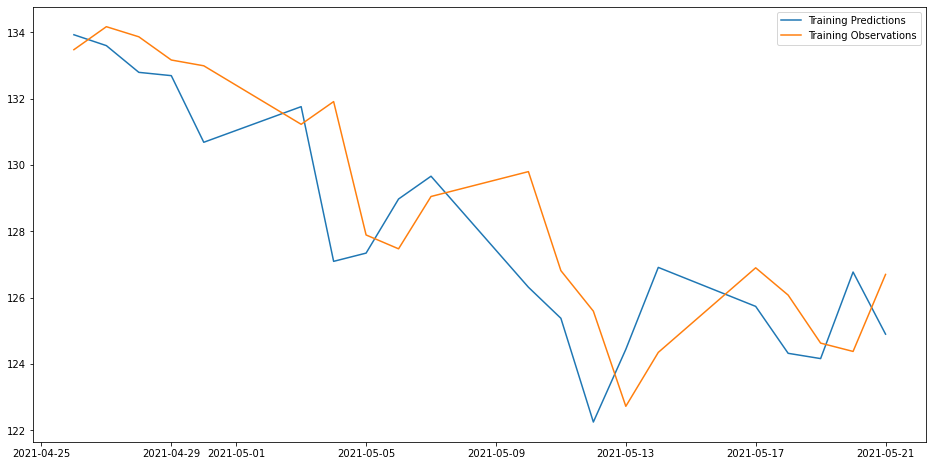

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df_compare['Date'].tail(20), df_compare['actual_close'].tail(20))
plt.plot(df_compare['Date'].tail(20), df_compare['pred_close'].tail(20))
plt.legend(['Training Predictions', 'Training Observations'])



- Predict and calculate predicted price and performance for val set

In [11]:
val_predictions = model.predict(x_val)
pred_val = pd.DataFrame(val_predictions, columns=['pred_val'])


In [12]:
df_compare2 = dates_val.reset_index(drop=True).merge(y_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(pred_val, how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(prev_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2['actual_close']=(df_compare2['Adj Close']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2['pred_close']=(df_compare2['pred_val']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2

,Date,Adj Close,pred_val,prev_close,actual_close,pred_close
0,2021-05-24,0.013314,0.003665,124.900703,126.563660,125.358485
1,2021-05-25,-0.001574,0.000015,126.563660,126.364502,126.565512
2,2021-05-26,-0.000394,0.002474,126.364502,126.314713,126.677070
3,2021-05-27,-0.012377,0.001870,126.314713,124.751335,126.550911
4,2021-05-28,-0.005348,0.003497,124.751335,124.084167,125.187599
...,...,...,...,...,...,...
105,2021-10-21,0.001474,0.000920,148.852829,149.072220,148.989769
106,2021-10-22,-0.005285,0.001078,149.072220,148.284393,149.232981
107,2021-10-25,-0.000336,0.002090,148.284393,148.234528,148.594276
108,2021-10-26,0.004575,0.001445,148.234528,148.912674,148.448779


In [13]:
rmse = np.sqrt(np.mean(df_compare2['pred_close'] - df_compare2['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare2['actual_close'],df_compare2['pred_close'])
r2 = r2_score(df_compare2['actual_close'],df_compare2['pred_close'])

print(f"The RMSE for validation set is: {rmse}")
print(f"The MAPE for validation set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for validation set is: 0.0057832507916652336
The MAPE for validation set is: 0.009039738300391228
The R2 Score for test set is: 0.9596930301033256


- Predict and calculate predicted price and performance for test set

In [14]:
test_predictions = model.predict(x_test)
pred_test = pd.DataFrame(test_predictions, columns=['pred_test'])

In [15]:
df_compare3 = dates_test.reset_index(drop=True).merge(y_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(pred_test, how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(prev_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3['actual_close']=(df_compare3['Adj Close']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3['pred_close']=(df_compare3['pred_test']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3

,Date,Adj Close,pred_test,prev_close,actual_close,pred_close
0,2021-10-28,0.024992,0.001959,148.443954,152.153809,148.734780
1,2021-10-29,-0.018156,-0.001545,152.153809,149.391357,151.918756
2,2021-11-01,-0.005607,0.003948,149.391357,148.553650,149.981156
3,2021-11-02,0.007116,0.002049,148.553650,149.610764,148.858011
4,2021-11-03,0.009799,0.001135,149.610764,151.076767,149.780601
...,...,...,...,...,...,...
121,2022-04-22,-0.027821,0.001901,166.419998,161.789993,166.736317
122,2022-04-25,0.006737,0.004397,161.789993,162.880005,162.501413
123,2022-04-26,-0.037328,0.000496,162.880005,156.800003,162.960753
124,2022-04-27,-0.001467,0.005812,156.800003,156.570007,157.711391


In [16]:
rmse = np.sqrt(np.mean(df_compare3['pred_close'] - df_compare3['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare3['actual_close'],df_compare3['pred_close'])
r2 = r2_score(df_compare3['actual_close'],df_compare3['pred_close'])

print(f"The RMSE for test set is: {rmse}")
print(f"The MAPE for test set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for test set is: 0.13672639429105474
The MAPE for test set is: 0.015082379917062452
The R2 Score for test set is: 0.872984838650506


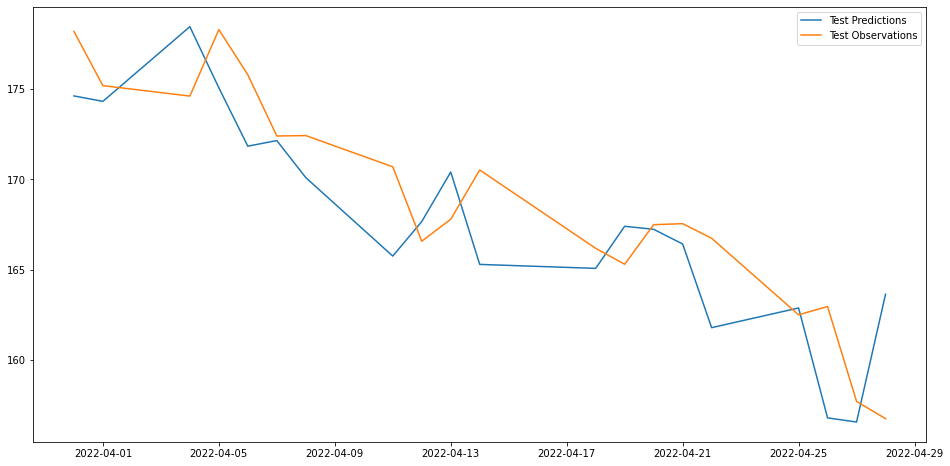

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df_compare3['Date'].tail(20), df_compare3['actual_close'].tail(20))
plt.plot(df_compare3['Date'].tail(20), df_compare3['pred_close'].tail(20))
plt.legend(['Test Predictions', 'Test Observations'])

### 5. Check coefficient values to understand the weight of each features

In [18]:
list(x_train.columns)

['bb_m1', 'D_m3', 'D_m2', 'D_m1']

In [20]:
array = model.coef_[-1]

In [21]:
array

array([-0.0034852 , -0.01205025,  0.01029886, -0.11280598])

In [23]:
#check coefficient values to understand weight
df_weight = pd.DataFrame({0:list(x_train.columns),1:array})
df_weight

,0,1
0,bb_m1,-0.003485
1,D_m3,-0.012050
2,D_m2,0.010299
3,D_m1,-0.112806


<BarContainer object of 4 artists>

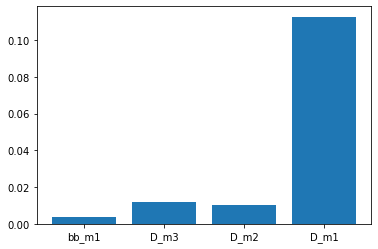

In [24]:
plt.bar(x=df_weight[0], height=abs(df_weight[1]))